In [1]:
import pandas as pd
import numpy as num_paths
import matplotlib.pyplot as psnrResault
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt


In [2]:
df=pd.read_csv("data.csv")

In [3]:
df=pd.DataFrame(df)
df.head()

,host,psnr,ssim_first,ssim_second,type,server
0,h1,31.235639,0.989438,19.762427,1.0,h14
1,h2,28.459433,0.977495,16.477240,1.0,h14
2,h3,24.837173,0.963479,14.374588,1.0,h14
3,h4,24.141326,0.956197,13.584935,1.0,h14
4,h5,24.690758,0.955428,13.509409,1.0,h14


In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
psnr,204.0,33.892463,7.210615,8.344914,28.894716,36.185105,39.645814,55.052599
ssim_first,204.0,0.980489,0.050941,0.396239,0.978190,0.996114,0.998325,0.999765
ssim_second,204.0,22.124304,6.301986,2.191353,16.614008,24.105403,27.761678,36.282662
type,204.0,2.138235,0.859951,1.000000,1.000000,2.000000,3.000000,3.500000


In [6]:
type1=df[df["type"]==1]
type1Mean=type1["ssim_first"].mean()
type1.describe().T

,count,mean,std,min,25%,50%,75%,max
psnr,60.0,26.340926,4.111731,19.889906,23.805936,24.946641,29.649484,35.364894
ssim_first,60.0,0.964290,0.019518,0.903046,0.953439,0.961881,0.982710,0.994183
ssim_second,60.0,15.338043,3.059437,10.134339,13.320058,14.188624,17.622492,22.353209
type,60.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
type2=df[df["type"]==2]
type2Mean=type2["ssim_first"].mean()
type2.describe().T

,count,mean,std,min,25%,50%,75%,max
psnr,60.0,34.147626,6.275669,8.344914,32.336137,35.875256,38.351710,40.711402
ssim_first,60.0,0.973469,0.088434,0.396239,0.991232,0.996056,0.997588,0.998591
ssim_second,60.0,22.350009,5.833877,2.191353,20.572155,24.040827,26.175691,28.511922
type,60.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
type3=df[df["type"]==3]
type3Mean=type3["ssim_first"].mean()
type3.describe().T

,count,mean,std,min,25%,50%,75%,max
psnr,66.0,39.713271,4.205639,26.557889,38.147286,39.715546,39.783083,55.052599
ssim_first,66.0,0.997650,0.002991,0.974828,0.997374,0.998404,0.998489,0.999765
ssim_second,66.0,27.356674,2.847752,15.990786,25.806538,27.970378,28.207368,36.282662
type,66.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [10]:
type1H6=type1[type1["host"]=="h6"]
type1H6Mean=type1H6["ssim_first"].mean()
type2H6=type2[type2["host"]=="h6"]
type2H6Mean=type2H6["ssim_first"].mean()
type3H6=type3[type3["host"]=="h6"]
type3H6Mean=type3H6["ssim_first"].mean()


print(f"Type    typeMean           TypeH6Mean    fark")
print(f"TYpe1   {type1Mean}  {type1H6Mean}    {type1H6Mean-type1Mean}")
print(f"TYpe3   {type2Mean}  {type2H6Mean}    {type2H6Mean-type2Mean}")
print(f"TYpe3   {type3Mean}  {type3H6Mean}    {type3H6Mean-type3Mean}")
#print(f"type1H6 Ortalama: {type1H6Mean} \ntype2H6 Ortalama: {type2H6Mean} \ntype3H6 Ortalama: {type3H6Mean}")

Type    typeMean           TypeH6Mean    fark
TYpe1   0.9642895333333333  0.9437948    -0.020494733333333293
TYpe3   0.9734693833333334  0.9521327999999999    -0.021336583333333548
TYpe3   0.9976499999999997  0.9981087272727273    0.00045872727272755487


In [54]:
df.head()

,host,psnr,ssim_first,ssim_second,type,server
0,h1,31.235639,0.989438,19.762427,1.0,h14
1,h2,28.459433,0.977495,16.477240,1.0,h14
2,h3,24.837173,0.963479,14.374588,1.0,h14
3,h4,24.141326,0.956197,13.584935,1.0,h14
4,h5,24.690758,0.955428,13.509409,1.0,h14


In [55]:
type1H6.reset_index(inplace=True)
type1H6=type1H6.drop("index",axis="columns")

In [57]:
type2H6.reset_index(inplace=True)
type2H6=type2H6.drop("index",axis="columns")

In [58]:
type3H6.reset_index(inplace=True)
type3H6=type3H6.drop("index",axis="columns")

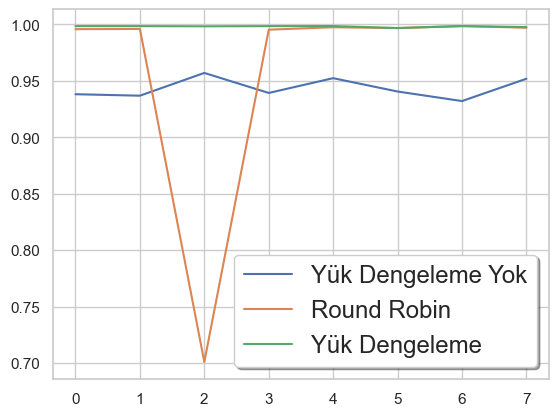

In [68]:
fig, ax = plt.subplots()
ax.plot(type1H6.index, type1H6.ssim_first,  label='Yük Dengeleme Yok')
ax.plot(type2H6.index, type2H6.ssim_first,  label='Round Robin')
ax.plot(type3H6.index, type3H6.ssim_first, label='Yük Dengeleme')

legend = ax.legend(loc='best', shadow=True, fontsize='x-large')

plt.show()